# Análise de sazonalidade e de autocorrelação dos fatores e da variável-alvo
---

# Bibliotecas

In [4]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Carregando os dados

In [5]:
# Carregando dados tratados e separando a variável-alvo: o PIB

data = pd.read_csv('../../data/data_tf.csv')
# data['Date'] = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC') --> se fosse para trimestre 
data['Date'] = pd.date_range(start = '2002-01-01', end = '2022-09-01', freq = 'MS')
data.set_index('Date', inplace = True)
gdp = data['gdp']
qgdp = (gdp.groupby(pd.PeriodIndex(gdp.index, freq = 'Q'), axis = 0)).mean()
qgdp

Date
2002Q1         NaN
2002Q2    0.043207
2002Q3    0.035439
2002Q4   -0.002176
2003Q1   -0.047467
            ...   
2021Q3    0.025785
2021Q4   -0.004322
2022Q1   -0.002627
2022Q2    0.017867
2022Q3    0.024755
Freq: Q-DEC, Name: gdp, Length: 83, dtype: float64

In [6]:
# Carregando os dados tranformados com PCA

data_pca = pd.read_csv('../../data/data_tfpca.csv')
# data['Date'] = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC') --> se fosse para trimestre 
data['Date'] = pd.date_range(start = '2002-01-01', end = '2022-09-01', freq = 'MS')
data_pca.set_index('Date', inplace = True)
data_pca.columns = data_pca.columns.str.replace(r"[C]", "F")
data_pca

C:\Users\HENRI\AppData\Local\Temp\ipykernel_14852\3990215449.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_pca.columns = data_pca.columns.str.replace(r"[C]", "F")


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F144,F145,F146,F147,F148,F149,F150,F151,F152,F153
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,0.043761,-0.301327,0.281876,-0.469964,-0.480213,0.267495,4.052348,-1.266854,1.604325,-0.029623,...,-0.019268,-0.011269,0.016385,0.005315,0.001778,-0.003904,0.002835,-0.008273,0.000115,-0.000836
2002-02-01,-1.349206,-0.550805,0.872002,1.933582,-1.591338,2.024872,3.075690,-1.082151,1.912396,0.327998,...,-0.005614,-0.005969,0.004629,0.001635,-0.001375,0.000777,0.000238,0.001074,-0.000113,0.000139
2002-03-01,2.921580,2.328693,0.027064,0.010019,0.273320,-0.980296,3.500098,-1.881021,0.807566,-0.224126,...,-0.002009,-0.001144,-0.009077,0.000726,-0.000015,0.005581,0.000153,0.000019,-0.000366,0.000013
2002-04-01,0.364593,1.489715,1.174915,0.080800,0.057597,0.565341,2.975339,-0.501164,2.160204,0.724248,...,0.008764,0.003876,-0.006997,0.001256,0.000781,0.004618,0.000676,-0.000453,-0.000656,0.000220
2002-05-01,-0.021967,-0.240064,-0.508700,0.346847,-1.195284,0.596571,2.105202,-1.360489,1.832412,-2.509840,...,-0.005855,-0.002427,0.009588,0.003823,-0.008100,-0.001832,-0.000813,-0.000200,0.000281,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,5.656367,3.587253,-2.324899,-1.407377,-1.077000,-0.319084,0.803622,1.423434,0.346798,-5.502160,...,-0.007328,0.002691,0.002994,-0.015947,0.000663,0.001475,0.002949,-0.000332,0.000137,-0.000122
2022-06-01,-1.250367,-1.734443,0.124854,-0.019953,-3.158825,-2.717110,1.054606,4.052564,-4.752051,-3.012939,...,0.010011,-0.007922,-0.009917,-0.010737,-0.002821,0.003087,0.002478,-0.000240,0.000248,0.000119
2022-07-01,1.715190,1.555140,-1.784176,3.606715,4.031505,-0.911592,-1.827816,-1.529660,2.326015,1.587895,...,0.001867,0.009011,-0.006219,-0.001837,-0.000040,0.001809,-0.002318,0.000064,-0.000011,0.000101


In [7]:
# Agrupando os fatores pela média para ficar na mesma frequência do PIB e preenchendo a primeira observação do PIB com a mediana 

qdata_pca = (data_pca.groupby(pd.PeriodIndex(data_pca.index, freq = 'Q'), axis = 0)).mean()
# qdata_pca.to_csv('../../data/qdata_tfpca.csv')
new_data = pd.merge(qgdp, qdata_pca, how='inner', left_index=True, right_index=True)
new_data.gdp.fillna(new_data.gdp.median(), inplace = True)
new_data['gdp'] = new_data['gdp'] * 100
new_data

,gdp,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F144,F145,F146,F147,F148,F149,F150,F151,F152,F153
Date,,,,,,,,,,,,,,,,,,,,,
2002Q1,0.388552,0.538712,0.492187,0.393648,0.491212,-0.599411,0.437357,3.542712,-1.410008,1.441429,...,-0.008964,-0.006128,0.003979,0.002559,0.000129,0.000818,0.001075,-2.393479e-03,-0.000121,-2.279415e-04
2002Q2,4.320709,-0.442968,-0.049328,-0.098923,0.011377,-0.766521,0.555046,2.055331,-1.683349,2.263962,...,-0.001609,0.000378,-0.002322,-0.000837,-0.002199,0.000739,0.000213,3.151107e-04,-0.000076,1.001810e-04
2002Q3,3.543887,0.424707,-0.647956,0.217876,-4.446846,-1.604402,1.708108,2.452098,0.985706,2.723189,...,0.001059,0.004871,0.000425,-0.004247,-0.002138,0.001481,-0.001209,8.372003e-05,-0.000030,4.005423e-07
2002Q4,-0.217573,-0.232993,-2.268012,6.315600,-11.643441,-3.549546,1.241341,2.347363,-0.177495,3.033051,...,0.001259,-0.002754,-0.004363,0.001607,0.002197,0.000537,0.001328,2.376067e-04,0.000069,7.265413e-05
2003Q1,-4.746729,-1.958564,0.865307,3.212400,-5.975119,-1.915151,0.577081,4.299099,-1.396467,0.792031,...,0.000778,-0.002990,0.005988,-0.000048,-0.000005,-0.000194,-0.000729,-1.147034e-04,0.000013,-1.006342e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q3,2.578462,-0.342376,0.778500,2.328568,-1.987400,-0.206580,-0.136194,-1.399026,1.282804,-0.357813,...,0.004611,-0.005063,0.000703,0.001253,0.002736,0.002235,0.000898,8.420353e-05,0.000012,1.338558e-05
2021Q4,-0.432211,1.693068,-3.285857,2.140440,-3.050982,1.034121,-0.989648,-1.303261,1.347845,1.466352,...,-0.004558,-0.002717,0.002519,0.001794,-0.002586,-0.003522,-0.000852,2.367683e-04,0.000068,-1.073587e-04
2022Q1,-0.262737,-2.583732,2.756302,0.194961,-5.354888,-1.059385,1.439377,-0.281474,0.233960,-3.768976,...,0.001292,-0.006083,-0.000287,0.001759,0.000691,0.000952,0.000797,3.536963e-07,0.000185,-1.849388e-05


In [8]:
new_data.index = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC')
new_data

,gdp,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F144,F145,F146,F147,F148,F149,F150,F151,F152,F153
2002-03-01,0.388552,0.538712,0.492187,0.393648,0.491212,-0.599411,0.437357,3.542712,-1.410008,1.441429,...,-0.008964,-0.006128,0.003979,0.002559,0.000129,0.000818,0.001075,-2.393479e-03,-0.000121,-2.279415e-04
2002-06-01,4.320709,-0.442968,-0.049328,-0.098923,0.011377,-0.766521,0.555046,2.055331,-1.683349,2.263962,...,-0.001609,0.000378,-0.002322,-0.000837,-0.002199,0.000739,0.000213,3.151107e-04,-0.000076,1.001810e-04
2002-09-01,3.543887,0.424707,-0.647956,0.217876,-4.446846,-1.604402,1.708108,2.452098,0.985706,2.723189,...,0.001059,0.004871,0.000425,-0.004247,-0.002138,0.001481,-0.001209,8.372003e-05,-0.000030,4.005423e-07
2002-12-01,-0.217573,-0.232993,-2.268012,6.315600,-11.643441,-3.549546,1.241341,2.347363,-0.177495,3.033051,...,0.001259,-0.002754,-0.004363,0.001607,0.002197,0.000537,0.001328,2.376067e-04,0.000069,7.265413e-05
2003-03-01,-4.746729,-1.958564,0.865307,3.212400,-5.975119,-1.915151,0.577081,4.299099,-1.396467,0.792031,...,0.000778,-0.002990,0.005988,-0.000048,-0.000005,-0.000194,-0.000729,-1.147034e-04,0.000013,-1.006342e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,2.578462,-0.342376,0.778500,2.328568,-1.987400,-0.206580,-0.136194,-1.399026,1.282804,-0.357813,...,0.004611,-0.005063,0.000703,0.001253,0.002736,0.002235,0.000898,8.420353e-05,0.000012,1.338558e-05
2021-12-01,-0.432211,1.693068,-3.285857,2.140440,-3.050982,1.034121,-0.989648,-1.303261,1.347845,1.466352,...,-0.004558,-0.002717,0.002519,0.001794,-0.002586,-0.003522,-0.000852,2.367683e-04,0.000068,-1.073587e-04
2022-03-01,-0.262737,-2.583732,2.756302,0.194961,-5.354888,-1.059385,1.439377,-0.281474,0.233960,-3.768976,...,0.001292,-0.006083,-0.000287,0.001759,0.000691,0.000952,0.000797,3.536963e-07,0.000185,-1.849388e-05
2022-06-01,1.786737,-0.366600,-0.601419,0.377088,-1.336048,-1.747521,-0.829394,0.277045,2.288487,-4.953368,...,-0.000667,0.000950,-0.001051,-0.006477,-0.001121,-0.000382,0.002099,-3.350728e-04,0.000094,4.020067e-05


# Sazonalidade

> x_sd: variável x decomposta em termos sazonais

In [9]:
gdp_sd = seasonal_decompose(new_data['gdp'], period = 4)
F1_sd = seasonal_decompose(new_data['F1'], period = 4)
F2_sd = seasonal_decompose(new_data['F2'], period = 4)
F3_sd = seasonal_decompose(new_data['F3'], period = 4)
F4_sd = seasonal_decompose(new_data['F4'], period = 4)

In [10]:
# Criando função para plotar os componentes de tendência e sazonalidade dos fatores e da variável alvo

def sd_plot(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=12)
    plt.title(title, fontsize = 24, loc = 'left')

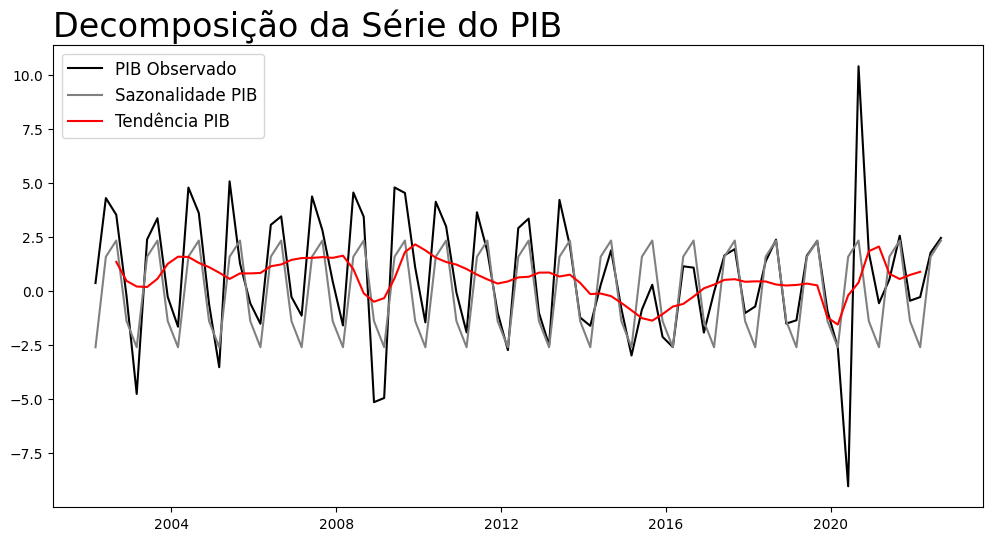

In [11]:
# GDP

sd_plot(gdp_sd.observed, gdp_sd.seasonal, gdp_sd.trend,
        'black', 'grey', 'red',
        'PIB Observado', 'Sazonalidade PIB', 'Tendência PIB',
        'Decomposição da Série do PIB')

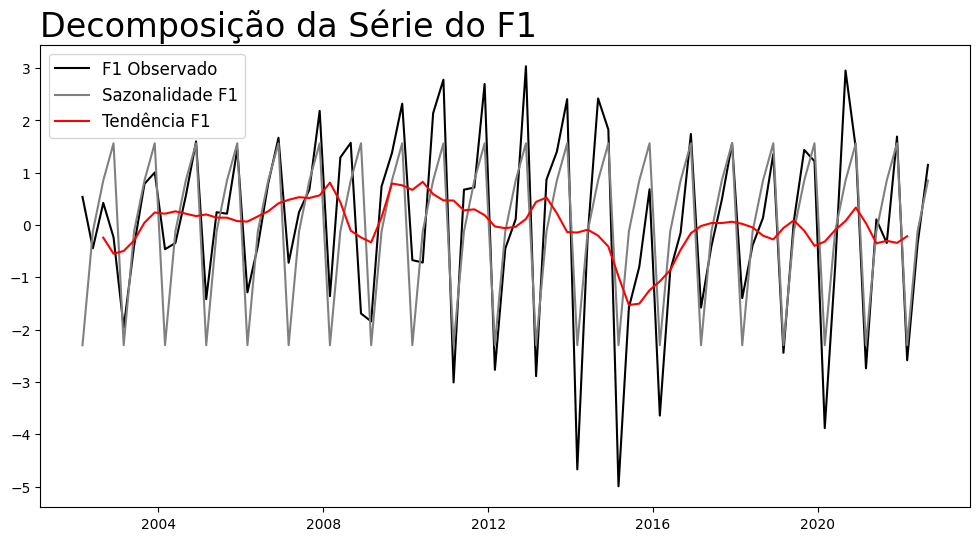

In [12]:
# F1

sd_plot(F1_sd.observed, F1_sd.seasonal, F1_sd.trend,
        'black', 'grey', 'red',
        'F1 Observado', 'Sazonalidade F1', 'Tendência F1',
        'Decomposição da Série do F1')

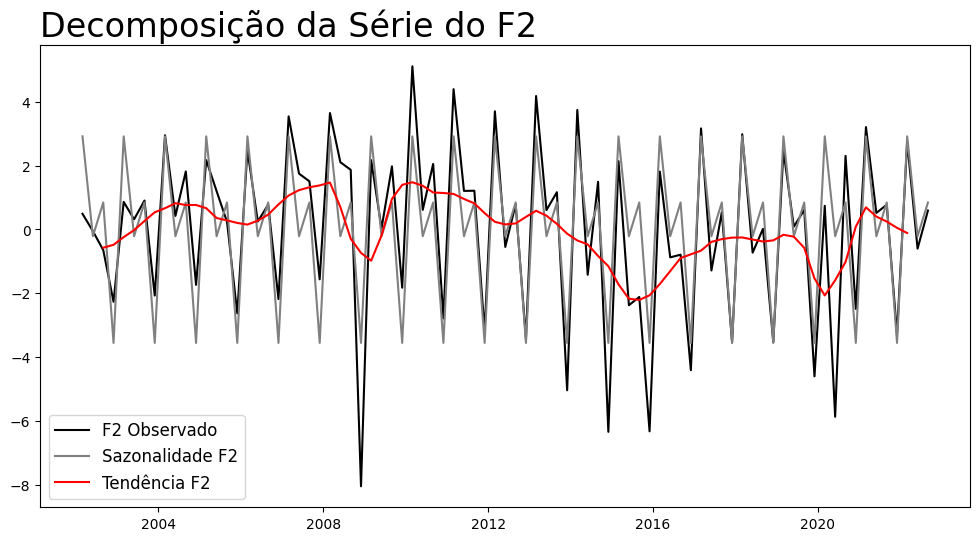

In [13]:
# F2

sd_plot(F2_sd.observed, F2_sd.seasonal, F2_sd.trend,
        'black', 'grey', 'red',
        'F2 Observado', 'Sazonalidade F2', 'Tendência F2',
        'Decomposição da Série do F2')

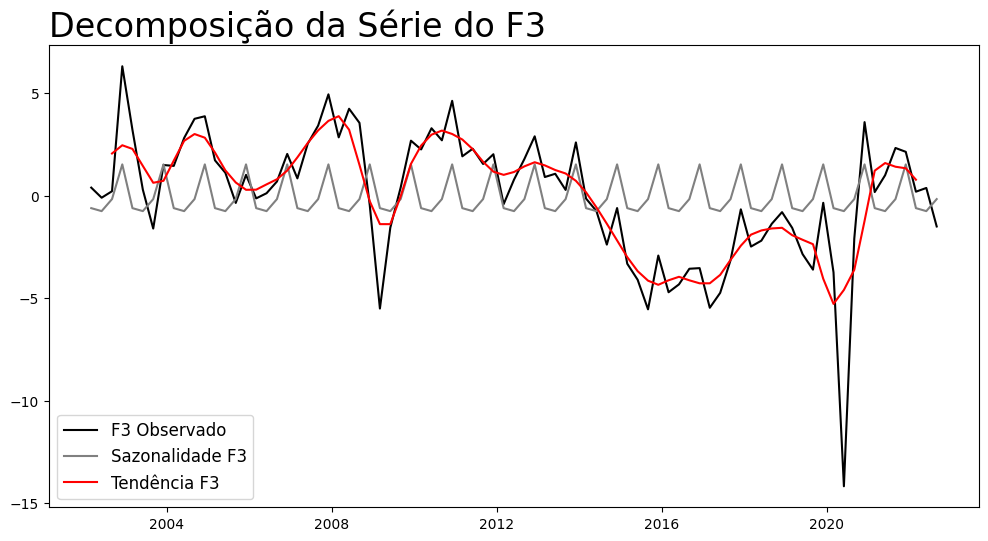

In [14]:
# F3

sd_plot(F3_sd.observed, F3_sd.seasonal, F3_sd.trend,
        'black', 'grey', 'red',
        'F3 Observado', 'Sazonalidade F3', 'Tendência F3',
        'Decomposição da Série do F3')

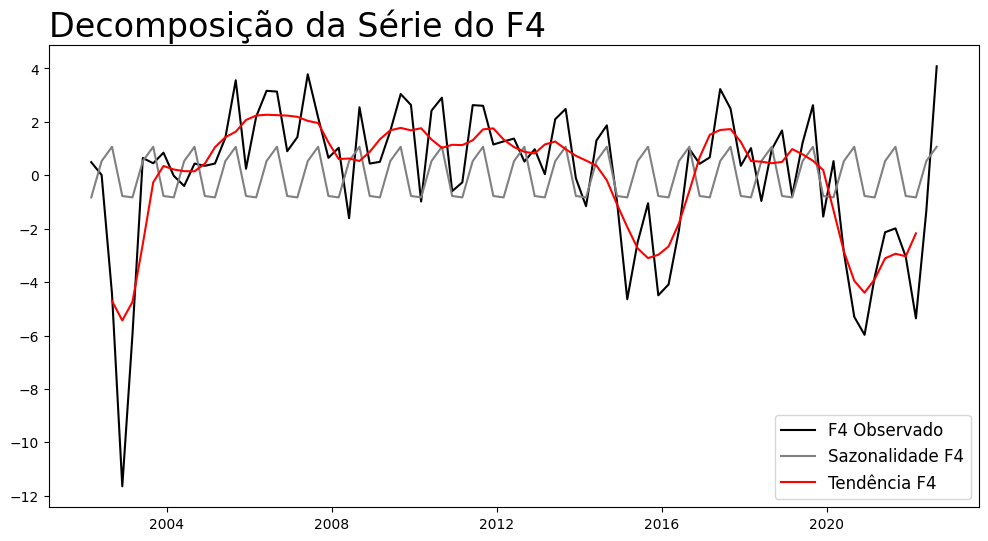

In [15]:
# F4

sd_plot(F4_sd.observed, F4_sd.seasonal, F4_sd.trend,
        'black', 'grey', 'red',
        'F4 Observado', 'Sazonalidade F4', 'Tendência F4',
        'Decomposição da Série do F4')

# Autocorrelação

In [20]:
# Criando função para plotar autocorrelação entre o PIB e os Fatores

# Criando função para plotar as autocorrelações dos resíduos das regressões

def autocorr_plots(y1, y2, y3, y4, y5, y6, title1, title2, title3, title4, title5, title6):
    fig = plt.figure(figsize=(16,22))
    ax1 = fig.add_subplot(611) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a primeira posição
    fig = plot_acf(y1, ax = ax1, title = title1)
    ax2 = fig.add_subplot(612) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a segunda posição
    fig = plot_acf(y2, ax=ax2, title = title2)
    ax3 = fig.add_subplot(613) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a terceira posição
    fig = plot_acf(y3, ax = ax3, title = title3)
    ax4 = fig.add_subplot(614) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a terceira posição
    fig = plot_acf(y4, ax = ax4, title = title4)
    ax5 = fig.add_subplot(615) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a terceira posição
    fig = plot_acf(y5, ax = ax5, title = title5)
    ax6 = fig.add_subplot(616) # 3 linhas, uma para cada gráfico. Essa ocupara a primera coluna e a terceira posição
    fig = plot_acf(y6, ax = ax6, title = title6)

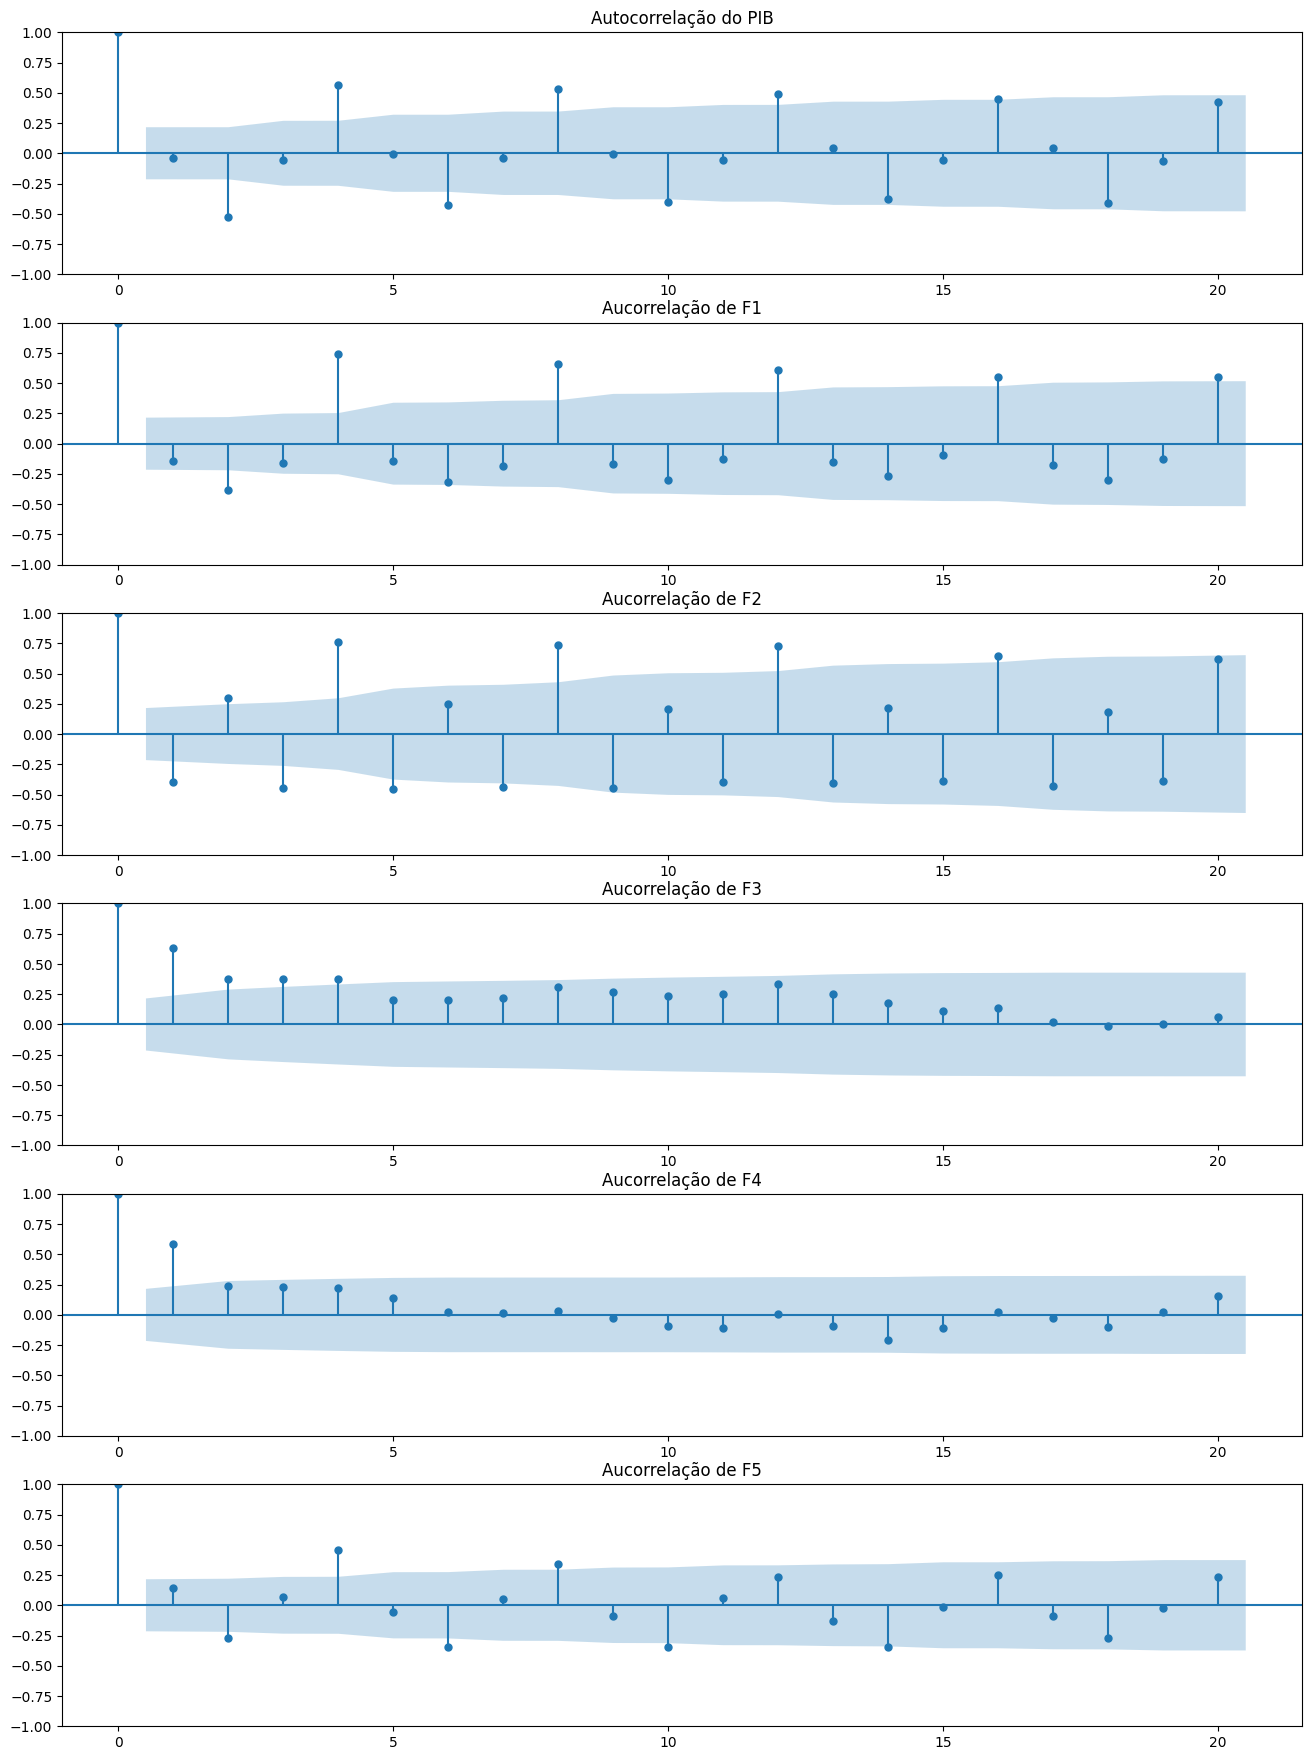

In [21]:
autocorr_plots(new_data['gdp'], new_data['F1'], new_data['F2'], new_data['F3'], new_data['F4'], new_data['F5'],
               'Autocorrelação do PIB',
               'Aucorrelação de F1',
               'Aucorrelação de F2',
               'Aucorrelação de F3',
               'Aucorrelação de F4',
               'Aucorrelação de F5')